# 0050 測試

<AxesSubplot:xlabel='date'>

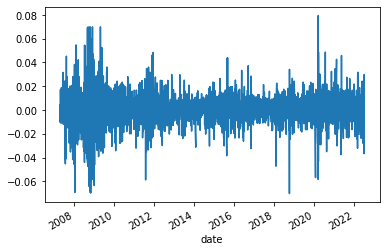

In [1]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 獲取0050收盤價資料
from finlab.data import Data
data = Data()
close = data.get_adj("收盤價")

# 將收盤假日期調整，這樣子等等使用pyfolio才不會有問題
close.index = close.index.tz_localize("Asia/Taipei")

# 每天報酬率繪圖
%matplotlib inline
close['0050'].pct_change().plot()

# 使用 Pyfolio 觀察個股報酬率

In [3]:
import pyfolio as pf

pf.create_returns_tear_sheet(close['0050'].pct_change())

ModuleNotFoundError: No module named 'pyfolio'

In [ ]:
import pickle
import pandas as pd

# 得到 上一個單元的 回測結果
ret = pickle.load(open("return_history.pkl", "rb"))

# 將回測報酬率取出來
ret = ret.pct_change().dropna()
ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')

# 利用pyfolio 比較報酬率
pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())